In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install umap-learn
!pip install hdbscan
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=8db91f4acdbac1404698a4b285cd1f5062b4eb4ef4f7546d0f76a08ece262023
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=f8fdf994203a06e61555b548af5c476a59f531286b6f714ea645e628ba0adeb7
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 52.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metad

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from string import punctuation
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
import re
from nltk.stem.porter import *
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
file_name_1 = "gdrive/My Drive/SBERT/complaints.csv"
data = pd.read_csv(file_name_1)
data.drop('Unnamed: 0',axis=1,inplace=True)
data

,Product,Consumer complaint narrative,label,Words Per Tweet
0,"Credit reporting, credit repair services, or o...",My name is XXXX XXXX. I pulled my credit repor...,2,70
1,"Credit reporting, credit repair services, or o...",I am becoming more and more frustrated I have ...,2,84
2,"Credit reporting, credit repair services, or o...","After purchasing a copy of my credit report, I...",2,147
3,"Credit reporting, credit repair services, or o...",I am writing to delete the following informati...,2,80
4,"Credit reporting, credit repair services, or o...",I submitted a dispute on a collection account ...,2,151
...,...,...,...,...
14995,Student loan,I have dealt with Navient ( and XXXX XXXX ) si...,5,265
14996,Student loan,Defaulted on my loans from the original compan...,5,73
14997,Student loan,"On XX/XX/2019, I learned that my last 3 studen...",5,345
14998,Student loan,I initially had my student loans with XXXX XXX...,5,262


In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

KeyboardInterrupt: ignored

In [ ]:
embeddings = model.encode(data['Consumer complaint narrative'].tolist())

In [ ]:
data1 = pd.DataFrame(embeddings,columns=["col{}".format(i) for i in range(1,385)])
data1['Consumer complaint narrative'] = data['Consumer complaint narrative'].tolist()
data1['label'] = data['label'].tolist()
data1['Product'] = data['Product'].tolist()

In [ ]:
data1.to_csv('gdrive/My Drive/SBERT/complaints_dataset_embeddings.csv')

In [ ]:
file_name_1 = "gdrive/My Drive/SBERT/complaints_dataset_embeddings.csv"
data = pd.read_csv(file_name_1)
data.drop('Unnamed: 0',axis=1,inplace=True)
data

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col378,col379,col380,col381,col382,col383,col384,Consumer complaint narrative,label,Product
0,-0.007053,0.036896,-0.062162,0.060747,-0.031190,-0.014175,-0.011366,-0.029301,-0.003502,-0.050387,...,-0.052337,-0.004978,-0.029252,0.038641,-0.013225,-0.040087,-0.038630,My name is XXXX XXXX. I pulled my credit repor...,2,"Credit reporting, credit repair services, or o..."
1,-0.085500,0.052140,0.039261,-0.001716,0.040331,-0.026381,0.103406,-0.072089,0.031275,-0.102059,...,-0.034818,-0.050657,0.095110,0.122888,-0.089320,-0.009627,-0.088591,I am becoming more and more frustrated I have ...,2,"Credit reporting, credit repair services, or o..."
2,-0.050837,0.005724,-0.080007,0.058624,-0.007886,0.040834,-0.050472,-0.015521,0.078216,-0.039137,...,0.004522,0.005217,-0.028298,-0.053705,-0.060150,0.019633,-0.010169,"After purchasing a copy of my credit report, I...",2,"Credit reporting, credit repair services, or o..."
3,-0.053147,0.102170,-0.074636,0.022305,0.045990,0.059465,0.075001,-0.039779,0.005551,-0.002273,...,-0.046540,-0.027904,-0.078049,0.071070,0.012554,0.014090,-0.069644,I am writing to delete the following informati...,2,"Credit reporting, credit repair services, or o..."
4,-0.108770,0.026251,-0.059413,0.035813,0.009491,0.000758,0.003904,-0.032836,0.036338,-0.014287,...,-0.051305,-0.086661,-0.041804,0.149977,-0.040714,-0.023308,-0.023216,I submitted a dispute on a collection account ...,2,"Credit reporting, credit repair services, or o..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-0.048272,0.036304,0.019112,-0.052642,-0.022701,-0.008826,0.012553,0.016953,-0.049602,-0.008039,...,0.059600,0.008215,-0.007710,0.041259,-0.036302,-0.068583,-0.051928,I have dealt with Navient ( and XXXX XXXX ) si...,5,Student loan
14996,-0.046041,-0.014821,0.012117,0.012679,-0.023543,-0.064916,-0.053447,-0.035481,0.034959,-0.076930,...,0.087139,-0.086958,-0.021444,0.061660,-0.061075,-0.067232,-0.014881,Defaulted on my loans from the original compan...,5,Student loan
14997,-0.049317,0.032106,0.039317,-0.035726,-0.000905,-0.073671,-0.007098,-0.015332,0.057714,0.023513,...,0.032381,-0.036337,0.001758,0.009410,-0.047653,-0.031852,-0.069767,"On XX/XX/2019, I learned that my last 3 studen...",5,Student loan
14998,-0.064613,0.064326,0.073982,-0.043781,0.040896,-0.033474,-0.018266,-0.018835,0.015461,-0.019160,...,0.010147,-0.018558,0.003787,0.070301,-0.062143,-0.043200,-0.113735,I initially had my student loans with XXXX XXX...,5,Student loan


In [ ]:
import umap
X,y = data.drop(columns=['Consumer complaint narrative','label','Product'],axis=1),data['label']
umap_embeddings = umap.UMAP(n_neighbors=15,
                            n_components=10,
                            metric='cosine').fit_transform(X)

In [ ]:

import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=200, min_samples=4,
                          metric='euclidean',
                          cluster_selection_method='eom').fit(umap_embeddings)

In [ ]:
unique_labels = np.unique(cluster.labels_,axis=0)
len(unique_labels)

10

In [ ]:

count = pd.Series(cluster.labels_).value_counts()
count

 3    4063
-1    3029
 1    2349
 2    2137
 5    1783
 8     553
 0     311
 4     285
 7     277
 6     213
dtype: int64

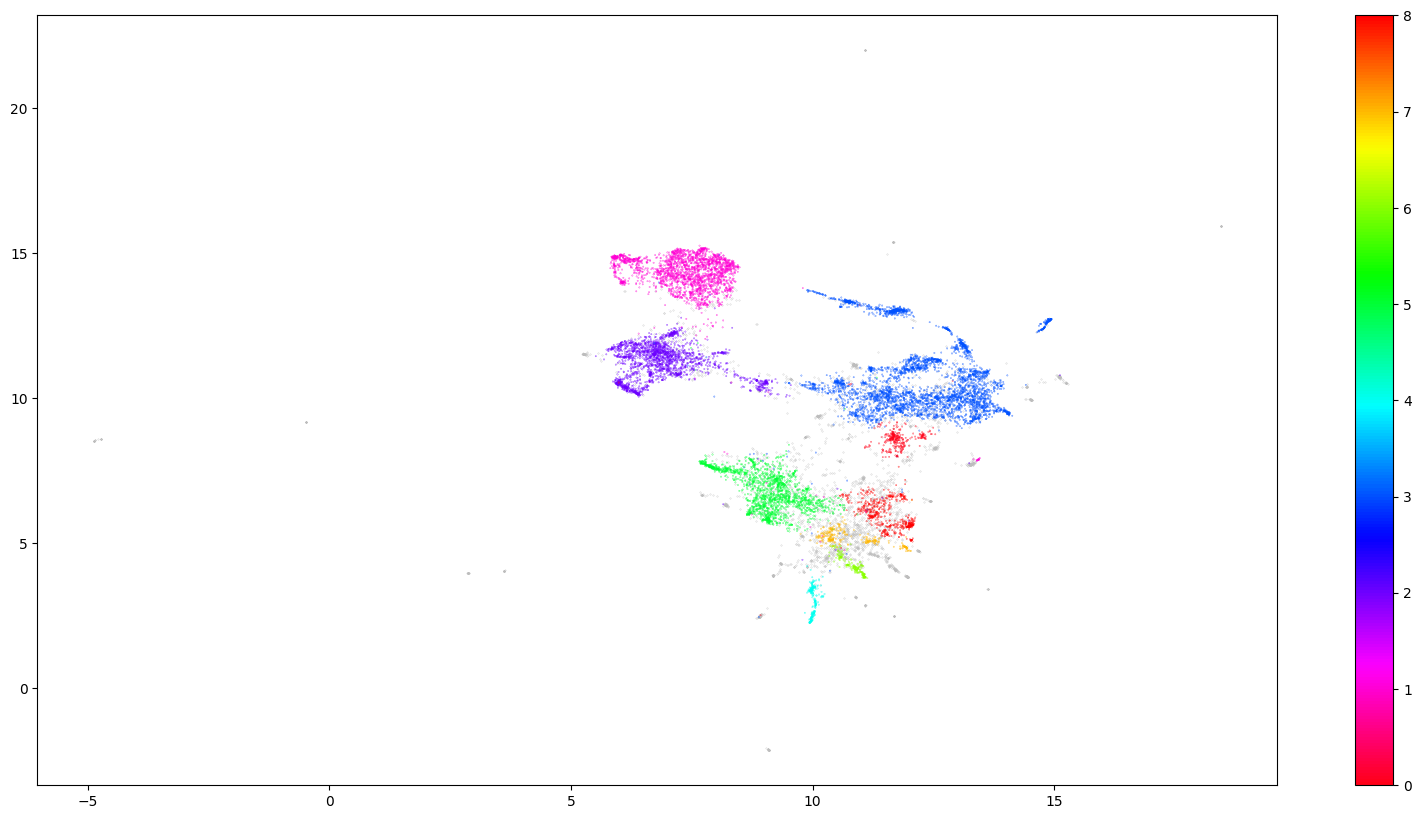

In [ ]:
# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(X)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
# Prepare data, extract embeddings, and prepare sub-models
docs = data['Consumer complaint narrative'].tolist()
cluster = hdbscan.HDBSCAN(min_cluster_size=200, min_samples=4,
                          metric='euclidean',
                          cluster_selection_method='eom',prediction_data=True)
umap_model = umap.UMAP(n_neighbors=15, n_components=10, min_dist=0.0, metric='cosine', random_state=42)
vectorizer_model = CountVectorizer(ngram_range=(1, 3),stop_words="english")
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = np.array(X)
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
# We reduce our embeddings to 2D as it will allows us to quickly iterate later on

# Train our topic model
topic_model = BERTopic(hdbscan_model=cluster,embedding_model=sentence_model, umap_model=umap_model,
                       vectorizer_model=vectorizer_model,calculate_probabilities=True,ctfidf_model=ctfidf_model, nr_topics='auto',verbose=True)
topics, probs = topic_model.fit_transform(docs, embeddings)

2023-10-17 02:49:34,066 - BERTopic - Reduced dimensionality
2023-10-17 02:49:36,551 - BERTopic - Clustered reduced embeddings


### c-TF-IDF representation of the topics in 2D using Umap and then visualize the two dimensions using plotly such that we can create an interactive view.

In [12]:
topic_model.visualize_topics()

### Using the previous method, we can visualize the topics and get insight into their relationships. However, you might want a more fine-grained approach where we can visualize the documents inside the topics to see if they were assigned correctly or whether they make sense. To do so, we can use the topic_model.visualize_documents() function. This function recalculates the document embeddings and reduces them to 2-dimensional space for easier visualization purposes

In [13]:
reduced_embeddings = umap.UMAP(n_neighbors=15, n_components=2,
                          min_dist=0.0, metric='cosine').fit_transform(embeddings)

topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings,
                                hide_document_hover=True, hide_annotations=True)

In [14]:
topic_model.visualize_barchart()

The topics that were created can be hierarchically reduced. In order to understand the potential hierarchical structure of the topics, we can use scipy.cluster.hierarchy to create clusters and visualize how they relate to one another. This might help to select an appropriate nr_topics when reducing the number of topics that you have created.

When tweaking your topic model, the number of topics that are generated has a large effect on the quality of the topic representations. Some topics could be merged and having an understanding of the effect will help you understand which topics should and which should not be merged.

That is where hierarchical topic modeling comes in. It tries to model the possible hierarchical nature of the topics you have created to understand which topics are similar to each other. Moreover, you will have more insight into sub-topics that might exist in your data.

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 6/6 [00:00<00:00,  6.20it/s]


In [ ]:
tree = topic_model.get_topic_tree(hierarchical_topics)
print(tree)

.
├─■──late_late payment_payment_days late_xx ── Topic: 6
└─xxxx_xxxx xxxx_xx_xxxx xxxx xxxx_xx xx
     ├─xxxx_xxxx xxxx_xx_xxxx xxxx xxxx_xx xx
     │    ├─■──fargo_wells_wells fargo_xxxx_xx ── Topic: 4
     │    └─xxxx_xxxx xxxx_xx_xxxx xxxx xxxx_xx xx
     │         ├─xxxx xxxx_xxxx xxxx xxxx_xxxx_account_credit
     │         │    ├─■──xxxx xxxx xxxx_xxxx xxxx_xxxx_credit_report ── Topic: 0
     │         │    └─■──card_bank_account_xx_xxxx ── Topic: 1
     │         └─loan_xx_xxxx_loans_payment
     │              ├─■──mortgage_xxxx_loan_xx_xxxx xxxx ── Topic: 3
     │              └─■──loans_loan_student_navient_payments ── Topic: 2
     └─■──capital_card_credit_credit card_account ── Topic: 5



In [ ]:
topic_model.visualize_heatmap()

In [ ]:
classes = np.array(data['Product'])
topics_per_class = topic_model.topics_per_class(docs, classes=classes)
topic_model.visualize_topics_per_class(topics_per_class)

6it [00:30,  5.08s/it]


In [20]:
# To visualize the probabilities of topic assignment
topic_model.visualize_distribution(probs[8])


In [ ]:
# Calculate the topic distributions on a token-level
topic_distr, topic_token_distr = topic_model.approximate_distribution(docs, calculate_tokens=True)

# Visualize the token-level distributions
df = topic_model.visualize_approximate_distribution(docs[0], topic_token_distr[0])
df

100%|██████████| 15/15 [01:04<00:00,  4.31s/it]


,My,name,is,XXXX,XXXX,pulled,my,credit,report,and,...,consumer,report,and,they,haven,responded,in,over,30,days


# Modelling

In [ ]:
labels = cluster.labels_
print(labels)

In [ ]:
unique_labels = np.unique(cluster.labels_,axis=0)

In [ ]:
print("no of clusters:",len(unique_labels))

In [ ]:
# test_x,test_y = data_test.drop(columns=['tweet','sentiment'],axis=1),data_test['sentiment']
# test_x = np.array(test_x)
# test_embeddings = umap.UMAP(n_neighbors=15,
#                             n_components=5,
#                             metric='cosine').fit_transform(test_x)
# test_labels, strengths = hdbscan.approximate_predict(cluster, test_embeddings)
# test_labels

In [ ]:
from collections import defaultdict
clusturing_models = defaultdict(list)
clustering_x = defaultdict(list)
clustering_y = defaultdict(list)

for i in range(len(data)):
  l,u = labels[i],umap_embeddings[i]
  clustering_x[l].append(u)
  clustering_y[l].append(data.label.tolist()[i])


In [ ]:
cluster_info = []
for i in clustering_x.keys():
  cluster_info.append([i,len(clustering_x[i])])
cluster_info = pd.DataFrame(cluster_info,columns=['cluster_name','sample_size'])
cluster_info

In [ ]:
data['label'].unique()

In [ ]:
data['Product'].unique()

In [ ]:

#original_model downsample
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
X,y = data.drop(columns=['Consumer complaint narrative','label','Product'],axis=1),data['label']
# umap_embeddings = umap.UMAP(n_neighbors=100,
#                             n_components=20,
#                             metric='cosine').fit_transform(X)
train_x,test_x,train_y,test_y = train_test_split(umap_embeddings, y, test_size=0.2, random_state=42)
original_clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42).fit(train_x,train_y)
y_train = original_clf.predict(train_x)
target_names = ['Checking or savings account', 'Credit card or prepaid card','Credit reporting, credit repair services, or other personal consumer reports','Debt collection','Mortgage','Student loan']
# print('training report for cluster {}'.format(n_cluster))
# print(classification_report(train_y, y_train, target_names=target_names))
target_names = ['Checking or savings account', 'Credit card or prepaid card','Credit reporting, credit repair services, or other personal consumer reports','Debt collection','Mortgage','Student loan']
y_pred = original_clf.predict(test_x)
print('f1 score',f1_score(test_y, original_clf.predict(test_x),average='weighted'))
print(classification_report(test_y, y_pred, target_names=target_names))

In [ ]:

results = []

for n_cluster in clustering_x.keys():
  new_X= np.array(clustering_x[n_cluster])

  new_y = np.array(clustering_y[n_cluster]).reshape(-1,1)

  train_x,test_x,train_y,test_y = train_test_split(new_X, new_y, test_size=0.2, random_state=42)
  print(train_x.shape)
  print(train_y.shape)
  clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42).fit(train_x,train_y)
  y_train = clf.predict(train_x)
  target_names = ['Checking or savings account', 'Credit card or prepaid card','Credit reporting, credit repair services, or other personal consumer reports','Debt collection','Mortgage','Student loan']
  # print('training report for cluster {}'.format(n_cluster))
  # print(classification_report(train_y, y_train, target_names=target_names))

  y_pred = clf.predict(test_x)
  test_score = f1_score(test_y, clf.predict(test_x),average='weighted')
  test_score_original = f1_score(test_y, original_clf.predict(test_x),average='weighted')
  results.append([test_score_original,test_score,test_score>test_score_original])
  # print('testing report for cluster {}'.format(n_cluster))
  # print(classification_report(test_y, y_pred, target_names=target_names))
results = pd.DataFrame(results,columns=['old_model_score','clustering_model_score','improvement'])
results

### Keep same sample size

In [ ]:
from collections import defaultdict
clusturing_models = defaultdict(list)
clustering_x = defaultdict(list)
clustering_y = defaultdict(list)
X = np.array(X)
for i in range(len(data)):
  l,u = labels[i],X[i]
  clustering_x[l].append(u)
  clustering_y[l].append(data.label.tolist()[i])

In [ ]:
#original_model downsample
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
X,y = data.drop(columns=['Consumer complaint narrative','label','Product'],axis=1),data['label']
# umap_embeddings = umap.UMAP(n_neighbors=100,
#                             n_components=20,
#                             metric='cosine').fit_transform(X)
train_x,test_x,train_y,test_y = train_test_split(umap_embeddings, y, test_size=0.2, random_state=42)
original_clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42).fit(train_x,train_y)
y_train = original_clf.predict(train_x)
target_names = ['Checking or savings account', 'Credit card or prepaid card','Credit reporting, credit repair services, or other personal consumer reports','Debt collection','Mortgage','Student loan']
# print('training report for cluster {}'.format(n_cluster))
# print(classification_report(train_y, y_train, target_names=target_names))
target_names = ['Checking or savings account', 'Credit card or prepaid card','Credit reporting, credit repair services, or other personal consumer reports','Debt collection','Mortgage','Student loan']
y_pred = original_clf.predict(test_x)
print('f1 score',f1_score(test_y, original_clf.predict(test_x),average='weighted'))
print(classification_report(test_y, y_pred, target_names=target_names))

In [ ]:
results = []

for n_cluster in clustering_x.keys():
  new_X= np.array(clustering_x[n_cluster])

  new_y = np.array(clustering_y[n_cluster]).reshape(-1,1)

  train_x,test_x,train_y,test_y = train_test_split(new_X, new_y, test_size=0.2, random_state=42)
  clf = LogisticRegression(random_state=0,max_iter=500).fit(train_x,train_y)
  y_train = clf.predict(train_x)
  target_names = ['negative', 'positive']
  # print('training report for cluster {}'.format(n_cluster))
  # print(classification_report(train_y, y_train, target_names=target_names))

  y_pred = clf.predict(test_x)
  test_score = roc_auc_score(test_y, clf.predict_proba(test_x)[:, 1])
  test_score_original = roc_auc_score(test_y, original_clf.predict_proba(test_x)[:, 1])
  results.append([test_score_original,test_score,test_score>test_score_original])
  # print('testing report for cluster {}'.format(n_cluster))
  # print(classification_report(test_y, y_pred, target_names=target_names))
results = pd.DataFrame(results,columns=['old_model_score','clustering_model_score','improvement'])
results